In [1]:
"""
Data generation
"""
import random
import math
import matplotlib.pyplot as plt

def generate_circle(n,radius=1):
    """
    Data generated on a circle
    """
    pts = []
    count = 0
    while len(pts) < n:
        x,y = random.uniform(-radius,radius),random.uniform(-radius,radius)
        if x*x+y*y <= radius:
            pts.append((x,y))
        count+=1
    #print(count)
    return pts
    
def generate_circle_circumference(n,radius=1):
    """
    Data generated on the boundary of a circle
    """
    points = []
    for _ in range(n):
        angle = random.random()
        x = radius*math.cos(angle*2*math.pi)
        y = radius*math.sin(angle*2*math.pi)
        points.append((x,y))
    return points

def generate_square(n,length=1):
    """
    Data generated on a square
    """
    return [(random.uniform(0, length),random.uniform(0, length)) for i in range(n)]

def generate_poly(n):
    """
    Data generated on the curve y = x**2
    """
    x,y = 0,0
    pts = []
    for _ in range(n):
        x += random.uniform(0, 1)
        y = x**2
        pts.append((x,y))
    return pts

generators = [generate_circle,generate_circle_circumference,generate_square,generate_poly]

def plot(random_points,ch):
    plt.plot(*list(zip(*random_points)),"r.")
    plt.plot(*list(zip(*ch)),"g-")
    plt.show()
    
def left_turn(p1,p2,p3):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    return x1*(y2-y3)+x2*(y3-y1)+x3*(y1-y2) >= 0

def test_convex_hull(CH_algo,n):
    for generator in generators:
        print(generator.__doc__)
        random_points = generator(n)
        ch = CH_algo(random_points)
        plot(random_points,ch)


    Data generated on a circle
    
starting to generate circle
Returning circle


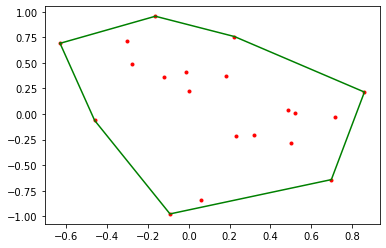


    Data generated on the boundary of a circle
    


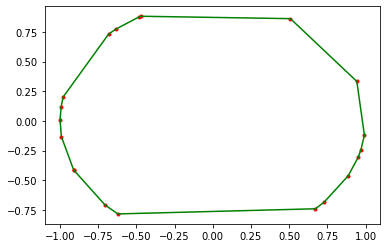


    Data generated on a square
    


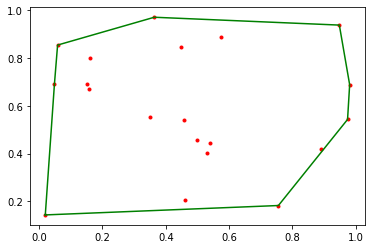


    Data generated on the curve y = x**2
    


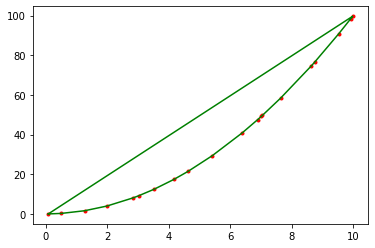

In [2]:
"""
Part A Graham's Scan
"""

def INC_CH(pointss):
    """
    Graham's Scan
    """
    points = sorted(pointss)
    upper = points[0:2]
    for p in points[2:]:
        while len(upper)>=2 and left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    points.reverse()
    lower = points[0:2]
    for p in points[2:]:
        while len(lower)>=2 and left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    return upper + lower

test_convex_hull(INC_CH,20)


    Data generated on a circle
    
starting to generate circle
Returning circle


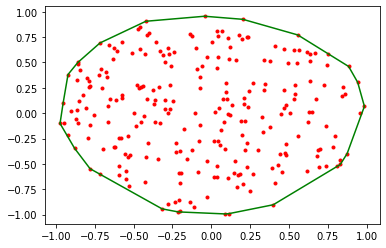


    Data generated on the boundary of a circle
    


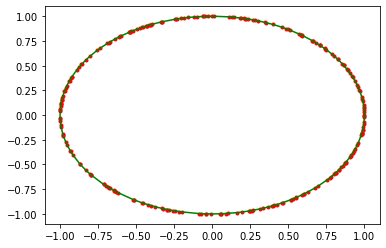


    Data generated on a square
    


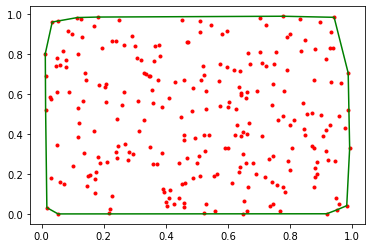


    Data generated on the curve y = x**2
    


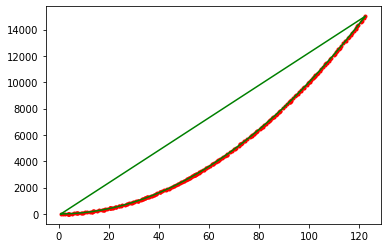

In [3]:
"""
Part B Gift Wrapping
"""

from copy import deepcopy

def GIFT_CH(pts):
    """
    Gift Wrapping
    """
    count = 0
    points = deepcopy(pts)
    p_start = min(points)
    CH = [p_start]
    p_left = p_start
    q = points[0] if not points[0] == p_start else points[1]
    while True:
        for z in points:
            if z == q:
                continue
            if not left_turn(p_left,z,q):
                q = z
        CH.append(q)
        if q in points:
            points.remove(q)
        if points:
            p_left = q
            q = points[0]
        else:
            break
        if p_left == p_start:
            break
    return CH

test_convex_hull(GIFT_CH,250)


    Data generated on a circle
    
starting to generate circle
Returning circle


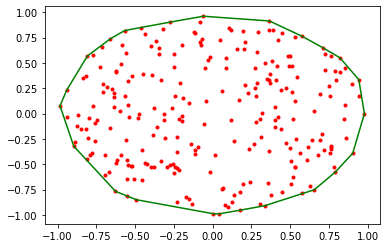


    Data generated on the boundary of a circle
    


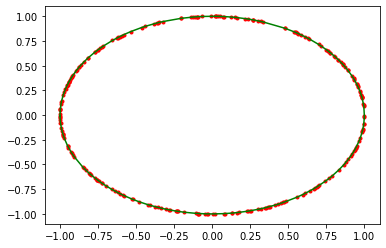


    Data generated on a square
    


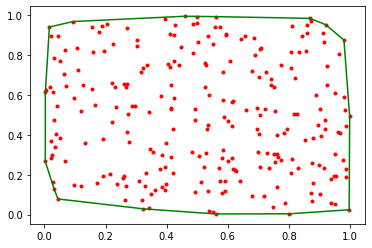


    Data generated on the curve y = x**2
    


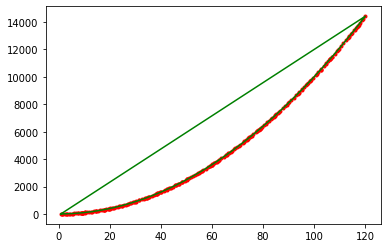

In [4]:
"""
Part C Chan's Algorithm
"""
from copy import deepcopy
import math

def compute_tangent(pts, p):
    if len(pts) == 1:
        return pts[0]
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

def UHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = min(points)
    maxx = max(points)[0]
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == maxx:
            break
        #compute the upper tangent t_i from p to U_i (if it exists)
        tangent_points = [compute_tangent(hull,p) for hull in upper_hulls if len(hull) > 0 ]
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent(tangent_points,p)
        #Remove any vertex of every Ui that is to the left of p . This could make some Ui empty
        upper_hulls = [ [point for point in hull if point[0]>=p[0]] for hull in upper_hulls ]
    return p[0] == maxx, final_hull

def LHwithSize(pts,h):
    n = len(pts)
    # Arbitrarily partition P into m =n/h subsets P1, · · · , Pm of size h each
    points = deepcopy(pts)
    m = math.ceil(n/h)
    partitions = [points[h*i:h*(i+1)] for i in range(m)]
    # Compute upper hull Ui of Pi, i = 1, · · · , m. . Next, we merge the upper hulls
    upper_hulls = [INC_CH(partition) for partition in partitions] #recursively?
    hull_points = [pt for hull in upper_hulls for pt in hull]
    # Initialize the upper hull U = {}
    # Initialize p ← point with smallest x-coordinate
    final_hull = []
    p = max(points)
    minx = min(points)[0]
    # Initialize l ← upwards ray from p
    q = compute_tangent(hull_points,p) ## what is this used for
    ## ray is now p -> q, but not used for anything
    for _ in range(h):
        final_hull.append(p)
        if p[0] == minx:
            break
        #compute the upper tangent t_i from p to U_i (if it exists)
        tangent_points = [compute_tangent(hull,p) for hull in upper_hulls if len(hull) > 0 ]
        #t ← tangent that makes the smallest angle with l
        #p ← the other tangent point on t . This is like the “change of pivot” in gift wrapping
        #l ← t . This is like “rotating the ray” in gift wrapping
        p = compute_tangent(tangent_points,p)
        #Remove any vertex of every Ui that is to the right of p . This could make some Ui empty
        upper_hulls = [ [point for point in hull if point[0]<=p[0]] for hull in upper_hulls ]
    return p[0] == minx, final_hull

def CH_CH(pts):
    if isinstance(pts,int):
        return [pts]
    if len(pts) <= 1:
        return pts
    n = len(pts)
    #for i in range(math.ceil(math.log(math.log(n)))):
    for i in range(4,n): #unreachable to go above log(log(n)) and above gives errors
        success, upper_hull = UHwithSize(pts,2**(2**i))
        if success:
            break
    for i in range(4,n):
        success, lower_hull = LHwithSize(pts,2**(2**i))
        if success:
            break
    return upper_hull + lower_hull + [upper_hull[0]]

test_convex_hull(CH_CH,250)

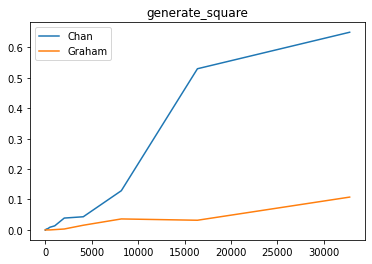

In [53]:
from timeit import Timer
import time
def timeAlgorithm(alg, generator):
    res = []
    for i in range(3,12):
        num_points = 2**i
        random_points = generator(num_points)
        t = Timer("CH_algo")
        start_time = time.time()
        ch = alg(random_points)
        end = time.time()
        res.append([num_points, end-start_time])
    return res

def experimentAndPlot(generator):

    res_chan = timeAlgorithm(CH_CH, generator)
    x, y = list(zip(*res_chan))
    plt.plot(x,y, label="Chan")
    plt.legend

    res_graham = timeAlgorithm(INC_CH, generator)
    x, y = list(zip(*res_graham))
    plt.plot(x,y, label="Graham")
    plt.title(generator.__name__)
    plt.legend()
    plt.show()

experimentAndPlot(generate_square)
experimentAndPlot(generate_circle_circumference)
experimentAndPlot(generate_circle)

In [5]:
n = 100
h = 12
import math
m = math.ceil(n/h)
points = [i for i in range(n)]
[len(points[h*i:h*(i+1)]) for i in range(m) ]

[12, 12, 12, 12, 12, 12, 12, 12, 4]

In [6]:
upper_hulls = [[(1,2),(3,4)],[(5,6),(7,8)]]
[p for hull in upper_hulls for p in hull]

[(1, 2), (3, 4), (5, 6), (7, 8)]

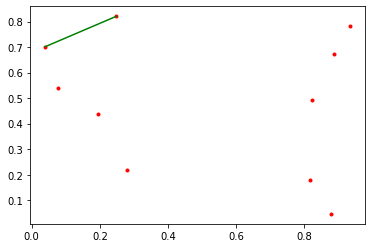

In [7]:
def compute_tangent(pts, p):
    q = pts[0] if not pts[0] == p else pts[1]
    for z in pts:
        if z == q or z == p:
            continue
        if not left_turn(p,z,q):
            q = z
    return q

pts = generate_square(10)
p = min(pts)
ch = [min(pts),compute_tangent(pts,p)]
plot(pts,ch)